# RFM Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The dataset under study contains credit card transactions from the State of Oklahoma. It includes information on purchases made through the purchase card programs administered by the state and higher educational institutions. The purchase card information is updated monthly after the end of every month. As such, July information is added in August, August in September, and so on and so forth.

In a brief, here's the data description:
- Dataset contains around 440k credit card transactions.
- Each row in the dataset refers to a credit card transaction by a cardholder.
- Each cardholder belongs to an agency.
- Each transaction has the following information:
    - cardholder name
    - agency
    - amount
    - transaction date
    - merchant name (vendor)
    - merchant category
    - description of the expense

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load and clean the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/res_purchase_card_(pcard)_fiscal_year_2014_3pcd-aiuu.csv',
                   parse_dates=['Transaction Date', 'Posted Date'])

In [ ]:
df.head()

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC)
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT..."


## Load and clean the dataset.

In [ ]:
# full name column
df['full_name'] = df['Cardholder Last Name'] + ', ' + df['Cardholder First Initial']

In [ ]:
df['full_name'].head()

0            Mason, C
1            Mason, C
2           Massey, J
3           Massey, T
4    Mauro-Herrera, M
Name: full_name, dtype: object

In [ ]:
df['full_name'].unique()

array(['Mason, C', 'Massey, J', 'Massey, T', ..., 'Newell, K', 'Kueck, D',
       'Lambert, B'], dtype=object)

In [ ]:
# cheking if the name 'agency'/'Agency' existed in df[Cardholder Last Name],df[Cardholder First Initial], and df[Agency Name]
if ('agency' in df['Cardholder Last Name'].values) or ('Agency' in df['Cardholder Last Name'].values) or \
   ('agency' in df['Cardholder First Initial'].values) or ('Agency' in df['Cardholder First Initial'].values) or \
   ('agency' in df['Agency Name'].values) or ('Agency' in df['Agency Name'].values):
    print("Name 'agency' or 'Agency' exists in the DataFrame.")
else:
    print("Name 'agency' or 'Agency' does not exist in the DataFrame.")

Name 'agency' or 'Agency' does not exist in the DataFrame.


In [ ]:
# remove agency (not include transactions made by agencies (customer name = agency))
df = df[df['Agency Number'].astype(str)!='agency']
df

,Year-Month,Agency Number,Agency Name,Cardholder Last Name,Cardholder First Initial,Description,Amount,Vendor,Transaction Date,Posted Date,Merchant Category Code (MCC),full_name
0,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,GENERAL PURCHASE,890.00,NACAS,2013-07-30,2013-07-31,CHARITABLE AND SOCIAL SERVICE ORGANIZATIONS,"Mason, C"
1,201307,1000,OKLAHOMA STATE UNIVERSITY,Mason,C,ROOM CHARGES,368.96,SHERATON HOTEL,2013-07-30,2013-07-31,SHERATON,"Mason, C"
2,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,J,GENERAL PURCHASE,165.82,SEARS.COM 9300,2013-07-29,2013-07-31,DIRCT MARKETING/DIRCT MARKETERS--NOT ELSEWHERE...,"Massey, J"
3,201307,1000,OKLAHOMA STATE UNIVERSITY,Massey,T,GENERAL PURCHASE,96.39,WAL-MART #0137,2013-07-30,2013-07-31,"GROCERY STORES,AND SUPERMARKETS","Massey, T"
4,201307,1000,OKLAHOMA STATE UNIVERSITY,Mauro-Herrera,M,HAMMERMILL COPY PLUS COPY EA,125.96,STAPLES DIRECT,2013-07-30,2013-07-31,"STATIONERY, OFFICE SUPPLIES, PRINTING AND WRIT...","Mauro-Herrera, M"
...,...,...,...,...,...,...,...,...,...,...,...,...
442453,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,992.00,TOTAL VALVE SYSTEMS,2014-06-20,2014-06-23,HARDWARE EQUIPMENT AND SUPPLIES,"Cardholder, e"
442454,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,2415.00,PRYOR WASTE & RECYCLING L,2014-06-20,2014-06-23,"UTILITIES - ELECTRIC,GAS,WATER,SANITARY","Cardholder, e"
442455,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,177.50,ACCURATE ENVIROMENTAL LAB,2014-06-20,2014-06-23,BUSINESS SERVICES NOT ELSEWHERE CLASSIFIED,"Cardholder, e"
442456,201406,98000,GRAND RIVER DAM AUTH.,Cardholder,e,GENERAL PURCHASE,32457.00,RED BUD SERVICE INC,2014-06-19,2014-06-23,PROFESSIONAL SERVICES NOT ELSEWHERE CLASSIFIED,"Cardholder, e"


In [ ]:
df['Agency Number'].unique()

array([ 1000,  2000,  2200,  2500,  3900,  4000,  4500,  4700,  4900,
        5500,  6000,  6500,  9000,  9200, 10500, 12500, 12700, 13100,
       14500, 15000, 16000, 18500, 19000, 20400, 21500, 22000, 24000,
       24100, 26500, 26900, 27000, 29000, 29200, 29600, 29800, 30000,
       30500, 30600, 30800, 30900, 31000, 31500, 32000, 32600, 34000,
       34200, 34500, 34600, 35000, 35300, 36900, 38500, 39000, 40000,
       40500, 41000, 41500, 41600, 42000, 42200, 43000, 43500, 44600,
       45000, 45200, 47700, 48000, 50900, 51000, 51500, 53000, 53100,
       55700, 56000, 56600, 56800, 57000, 58200, 58500, 58800, 60500,
       60600, 61000, 61900, 62500, 62900, 63200, 63300, 63500, 64500,
       65000, 66500, 67000, 67700, 69500, 71500, 74000, 75000, 76000,
       77000, 77200, 79000, 80000, 80500, 80700, 81500, 83000, 83500,
       87500, 88000, 92200, 98000, 39100, 86500, 27500, 56300])

In [ ]:
# remove negative amounts
df = df[df['Amount']> 0]
df['Amount'].unique()

array([  890.  ,   368.96,   165.82, ...,  3302.6 , 32457.  ,  4714.07])

# RFM Analysis

In [ ]:
import datetime

current_date = datetime.datetime(2014, 7, 1)
current_date

datetime.datetime(2014, 7, 1, 0, 0)

### Recency

In [ ]:
# get max transaction date per customer
df_latest_invoice = df.groupby('full_name')['Transaction Date'].max()
df_latest_invoice.head()

full_name
15000, 1   2014-03-10
24100, 2   2014-03-14
42000, 4   2014-06-04
44600, 4   2013-07-08
48000, 4   2014-06-30
Name: Transaction Date, dtype: datetime64[ns]

In [ ]:
# get number of days between latest invoice date and current date
# .dt.days means that we only get the actual days (not decimal)
df_recency = (current_date - df_latest_invoice).dt.days
df_recency.head()

full_name
15000, 1    113
24100, 2    109
42000, 4     27
44600, 4    358
48000, 4      1
Name: Transaction Date, dtype: int64

In [ ]:
#just making sure that there is a number name
if('15000, 1' in df['full_name'].values): print('it exist')
else: print('not existed')

it exist


### Frequency

In [ ]:
# get frequency (count)
df_frequency = df.groupby('full_name')['full_name'].count()
df_frequency.head()

full_name
15000, 1     1
24100, 2     9
42000, 4    16
44600, 4     1
48000, 4    11
Name: full_name, dtype: int64

### Monetary

In [ ]:
# get the total amount (sum of all amounts)
df_monetary = df.groupby('full_name')['Amount'].sum()
df_monetary.head()

full_name
15000, 1    4626.46
24100, 2    2819.38
42000, 4    2143.97
44600, 4     111.99
48000, 4    1514.03
Name: Amount, dtype: float64

## RFM Scores

We now merge these tables into a single dataframe. We put each series together in a dictionary and use `pd.DataFrame`

In [ ]:
df_rfm = pd.DataFrame({'recency':df_recency, 'frequency':df_frequency, 'monetary':df_monetary})
df_rfm.head()

,recency,frequency,monetary
full_name,,,
"15000, 1",113,1,4626.46
"24100, 2",109,9,2819.38
"42000, 4",27,16,2143.97
"44600, 4",358,1,111.99
"48000, 4",1,11,1514.03


#### Calculate RFM scores. Use quantiles (0.25, 0.50, 0.75) to map the scores from 1 to 4

In [ ]:
quantiles = df_rfm.quantile(q=[0.25,0.50,0.75])
quantiles

,recency,frequency,monetary
0.25,5.00,12.0,2220.0675
0.50,14.00,34.0,7826.1700
0.75,54.25,89.0,24440.0375


Using the quantiles function, we can get our thresholds for segmentation.

1. For recency score (lower is better):
- Score = 1; quantile between 0-0.25
- Score = 2; quantile between 0.25-0.5
- Score = 3; quantile between 0.5-0.75
- Score = 4; quantile between 0.75 - 1

<br>  
2. For frequency and monetary score (higher is better):
- Score = 1; quantile between 0.75 - 1
- Score = 2; quantile between 0.5-0.75
- Score = 3; quantile between 0.25-0.5
- Score = 4; quantile between 0-0.25

<br>  

#### Recency Score

In [ ]:
# create a dictionary with the recency quantiles
recency_dict = quantiles['recency'].to_dict()
recency_dict

{0.25: 5.0, 0.5: 14.0, 0.75: 54.25}

In [ ]:
# create a function to calculate recency score
def recency_score(recency, recency_dict):
    if recency <= recency_dict[0.25]:
        # recency_score = 1 if recency is between 0-0.25 quantile
        return '1'
    elif recency <= recency_dict[0.5]:
        # recency_score = 2 if recency is between 0.25-0.5 quantile
        return '2'
    elif recency <= recency_dict[0.75]:
        # recency_score = 3 if recency is between 0.5-0.75 quantile
        return '3'
    else:
        # recency_score = 4 if recency is between 0.75-1 quantile
        return '4'

df_rfm['recency_score'] = df_rfm['recency'].apply(recency_score, args=(recency_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score
full_name,,,,
"15000, 1",113,1,4626.46,4
"24100, 2",109,9,2819.38,4
"42000, 4",27,16,2143.97,3
"44600, 4",358,1,111.99,4
"48000, 4",1,11,1514.03,1


### Frequency Score

In [ ]:
# create a dictionary with the frequency quantiles
frequency_dict = quantiles['frequency'].to_dict()
frequency_dict

{0.25: 12.0, 0.5: 34.0, 0.75: 89.0}

In [ ]:
# create a function to calculate frequency score
def frequency_score(frequency, frequency_dict):
    if frequency <= frequency_dict[0.25]:
        # frequency_score = 4 if frequency is between 0-0.25 quantile
        return '4'
    elif frequency <= frequency_dict[0.5]:
        # frequency_score = 3 if frequency is between 0.25-0.5 quantile
        return '3'
    elif frequency <= frequency_dict[0.75]:
        # frequency_score = 2 if frequency is between 0.5-0.75 quantile
        return '2'
    else:
        # frequency_score = 1 if frequency is between 0.75-1 quantile
        return '1'

df_rfm['frequency_score'] = df_rfm['frequency'].apply(frequency_score, args=(frequency_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score
full_name,,,,,
"15000, 1",113,1,4626.46,4,4
"24100, 2",109,9,2819.38,4,4
"42000, 4",27,16,2143.97,3,3
"44600, 4",358,1,111.99,4,4
"48000, 4",1,11,1514.03,1,4


### Monetary Score

In [ ]:
# create a dictionary with the monetary quantiles
monetary_dict = quantiles['monetary'].to_dict()
monetary_dict

{0.25: 2220.0674999999997, 0.5: 7826.17, 0.75: 24440.0375}

In [ ]:
# create a function to calculate monetary score
def monetary_score(monetary, monetary_dict):
    if monetary <= monetary_dict[0.25]:
        # monetary_score = 4 if monetary is between 0-0.25 quantile
        return '4'
    elif monetary <= monetary_dict[0.5]:
        # monetary_score = 3 if monetary is between 0.25-0.5 quantile
        return '3'
    elif monetary <= monetary_dict[0.75]:
        # monetary_score = 2 if monetary is between 0.5-0.75 quantile
        return '2'
    else:
        # monetary_score = 1 if monetary is between 0.75-1 quantile
        return '1'

df_rfm['monetary_score'] = df_rfm['monetary'].apply(monetary_score, args=(monetary_dict,))
df_rfm.head()

,recency,frequency,monetary,recency_score,frequency_score,monetary_score
full_name,,,,,,
"15000, 1",113,1,4626.46,4,4,3
"24100, 2",109,9,2819.38,4,4,3
"42000, 4",27,16,2143.97,3,3,4
"44600, 4",358,1,111.99,4,4,4
"48000, 4",1,11,1514.03,1,4,4


#### Concatenate the RFM Scores

In [ ]:
# Concatenate the three created columns earlier
df_rfm['rfm_score'] = df_rfm['recency_score'] + df_rfm['frequency_score'] + df_rfm['monetary_score']
df_rfm.head(10)

,recency,frequency,monetary,recency_score,frequency_score,monetary_score,rfm_score
full_name,,,,,,,
"15000, 1",113,1,4626.46,4,4,3,443
"24100, 2",109,9,2819.38,4,4,3,443
"42000, 4",27,16,2143.97,3,3,4,334
"44600, 4",358,1,111.99,4,4,4,444
"48000, 4",1,11,1514.03,1,4,4,144
"53000, 5",264,1,0.04,4,4,4,444
"53100, 5",32,3,1.20,3,4,4,344
"60500, 6",32,2,250.10,3,4,4,344
"75000, 7",320,2,59747.22,4,4,1,441


#### Insights, recommendations, analysis, visualizations.

aditional codes

In [ ]:
# store the segment counts in a dictionary
segment_counts = {'best_customers (111)': len(df_rfm[df_rfm['rfm_score']=='111']),
                  'loyal_customers (X1X)': len(df_rfm[df_rfm['frequency_score']=='1']),
                  'big_spenders (XX1)': len(df_rfm[df_rfm['monetary_score']=='1']),
                  'almost_lost (311)': len(df_rfm[df_rfm['rfm_score']=='311']),
                  'lost_good_customers (411)': len(df_rfm[df_rfm['rfm_score']=='411']),
                  'lost_cheap_customers (444)': len(df_rfm[df_rfm['rfm_score']=='444'])}

In [ ]:
df_counts = pd.DataFrame(segment_counts.values(), index=segment_counts.keys(), columns=['counts'])
df_counts

,counts
best_customers (111),575
loyal_customers (X1X),1282
big_spenders (XX1),1301
almost_lost (311),86
lost_good_customers (411),44
lost_cheap_customers (444),622


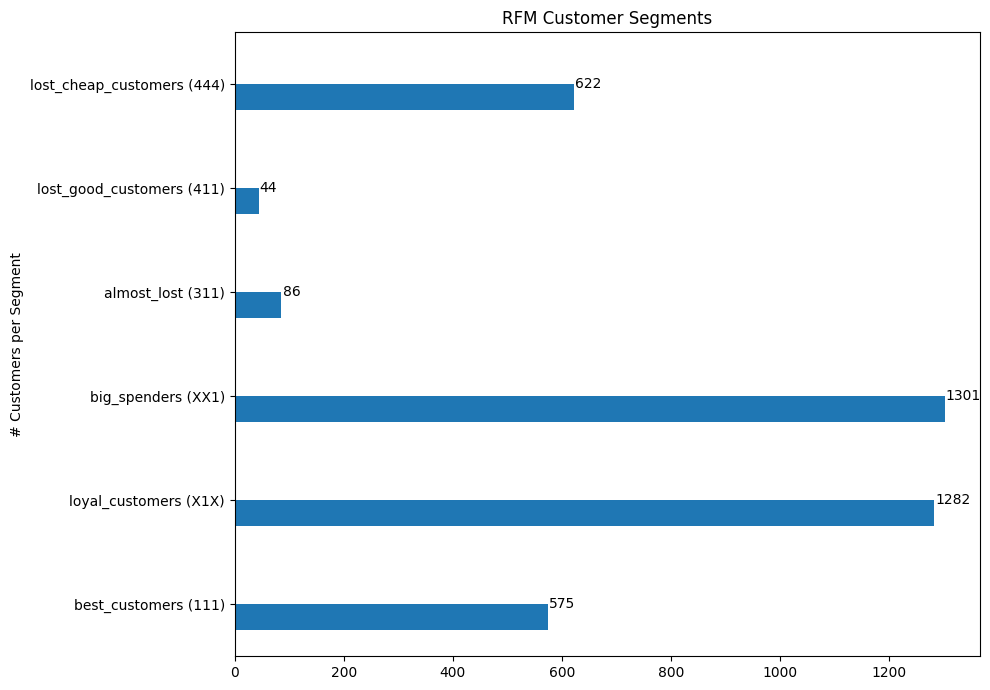

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
df_counts.plot(kind='barh', ax=ax, legend=False)
ax.set_title('RFM Customer Segments')
ax.set_ylabel('# Customers per Segment')

# Add labels to each bar to display the counts on top
for i, v in enumerate(df_counts['counts']):
    ax.text(v + 2, i, str(v), va='center')

plt.tight_layout()
plt.show()

In [ ]:
# get percentages
customer_count = df['full_name'].nunique()

df_counts['percentage'] = df_counts['counts']/customer_count
df_counts

,counts,percentage
best_customers (111),575,0.110492
loyal_customers (X1X),1282,0.246349
big_spenders (XX1),1301,0.250000
almost_lost (311),86,0.016526
lost_good_customers (411),44,0.008455
lost_cheap_customers (444),622,0.119523


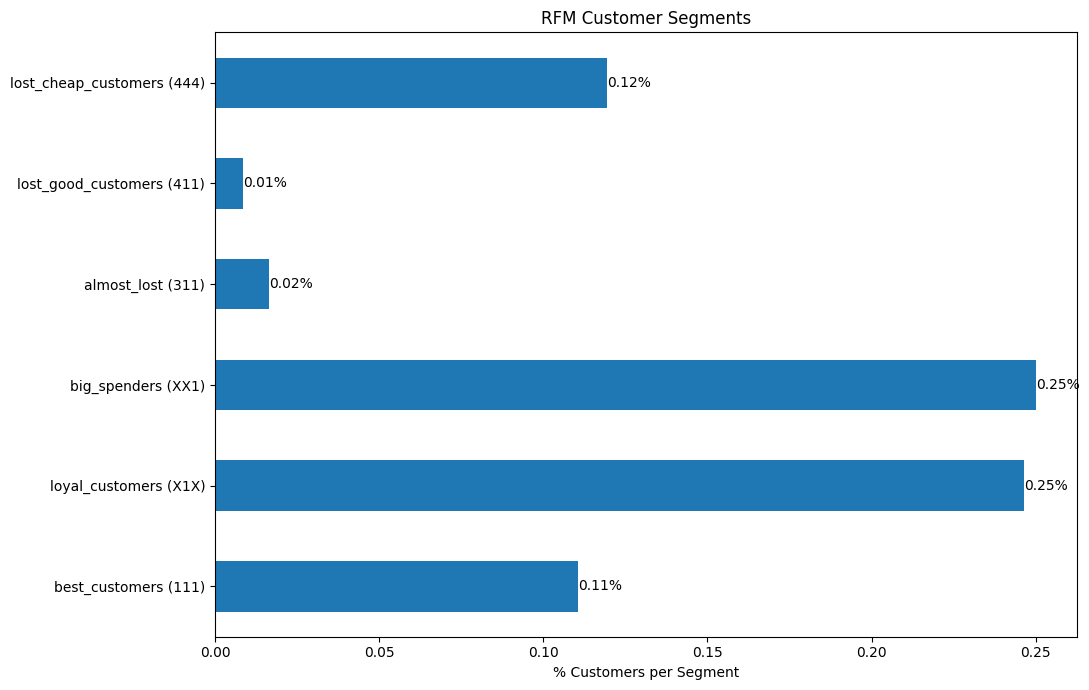

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
df_counts['percentage'].plot(kind='barh', ax=ax, legend=False)

ax.set_title('RFM Customer Segments')
ax.set_xlabel('% Customers per Segment')

# Add labels to each bar to display the percentage values
for i, v in enumerate(df_counts['percentage']):
    ax.text(v + 0.0, i, f'{v:.2f}%', va='center')

plt.tight_layout()
plt.show()

**Conclusion and Recomendation**

Base on the graph that we have the company lost a total of 13% of customers in lost_cheap_customers and lost_good_customers. The good side is it lost only 1% of good customers, but while living in a business life we know that "every customer counts/important" even if its from a low percentage, and other obsevation from the graph the company is strong at big spender customer and loyal customers but a low percent in best_customers.

My recomedation is:
- Get the lost customers back. Send the customers some coupons and a "coming back prize" for those customers that are returning or need to return.
- Maintain the high percentages customers (the big_spenders & loyal_customer) and the best_customers, i suggest that the company may give them rewards.
- Highly recommend to have a meeting to discuss the plans of how to get back the customers, maintain all of the customers, and convice the customers to use the card, maybe the company can add some incentives to the customers every time they put some amount of money in their card or every time they purchase in a specific amount of money they can have a discount.